In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(factoextra)

# Functions

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [27]:
hla <- xlsx::read.xlsx(file = paste0(datapath, "/HLA/UHN-20230127-B257-HLA.xlsx"), sheetIndex = 1)

In [28]:
hla[ hla$Sample.ID == "418-02",]

,Sample.ID,Locus,Allele.1,Allele.2,Comments,Diploid.Ambiguities,Allele.1.Ambiguities,Allele.2.Ambiguities
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
577,418-02,A,A*68:01:02,A*68:03:01,,,,
578,418-02,B,B*39:05:01,B*44:02:01,,,,
579,418-02,C,C*07:02:01,C*07:04:01,,,,
580,418-02,DPA1,DPA1*02:01:01,DPA1*02:01:01,,,,
581,418-02,DPB1,DPB1*09:01:01,DPB1*14:01:01,,,,
582,418-02,DQA1,DQA1*01:01:01,DQA1*03:01:01,,,,
583,418-02,DQB1,DQB1*03:02:01,DQB1*05:01:01,,,,
584,418-02,DRB1,DRB1*01:01:01,DRB1*04:04:01,,,,
585,418-02,DRB345,DRB345*Not_Present,DRB4*01:03:01,,,,


make a mtrix for hla pre qc

In [29]:
hla1 <- hla[ hla$Locus != "DRB345",] # remove DRB345

In [30]:
allhla_preqc <- matrix(NA, nrow = length(unique(hla1$Sample.ID)), ncol = length(unique(c(hla1$Allele.1, hla1$Allele.2))),
                       dimnames = list(unique(hla1$Sample.ID), unique(c(hla1$Allele.1, hla1$Allele.2))))

In [31]:
hla1[ hla1$Sample.ID == "418-02", c("Allele.1", "Allele.2")] 

,Allele.1,Allele.2
,<chr>,<chr>
577,A*68:01:02,A*68:03:01
578,B*39:05:01,B*44:02:01
579,C*07:02:01,C*07:04:01
580,DPA1*02:01:01,DPA1*02:01:01
581,DPB1*09:01:01,DPB1*14:01:01
582,DQA1*01:01:01,DQA1*03:01:01
583,DQB1*03:02:01,DQB1*05:01:01
584,DRB1*01:01:01,DRB1*04:04:01


In [36]:
for(i in 1:nrow(allhla_preqc)){
    myhla <- hla1[ hla1$Sample.ID == rownames(allhla_preqc)[i], c("Allele.1", "Allele.2")]
    allalleles <- c(myhla$Allele.1, myhla$Allele.2)
    mytab <- as.data.frame(table(allalleles), stringsAsFactors = F)
    allhla_preqc[i, match(mytab$allalleles, colnames(allhla_preqc) )] <- mytab$Freq}

In [37]:
mytab

allalleles,Freq
<chr>,<int>
A*11:01:01,1
A*23:01:01,1
B*07:02:01,2
C*07:02:01,2
DPA1*01:03:01,2
DPB1*04:01:01,2
DQA1*01:02:01,1
DQA1*01:03:01,1
DQB1*06:02:01,1


In [39]:
# order colnames
allhla_preqc <- allhla_preqc[, order(colnames(allhla_preqc))]

In [40]:
allhla_preqc[ is.na(allhla_preqc)] <- 0

In [41]:
readr::write_rds(allhla_preqc, paste0(datapath, "HLA/allhla_preqc.rds"))

# Some cleanup and QC

In [45]:
hlafiles <- list.files(path = paste0(datapath, "/HLA/"), pattern = "INT", full.names = TRUE)

In [47]:
hlafiles <- hlafiles[ hlafiles != "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_PCA_postqc.rds"]
hlafiles <- hlafiles[ hlafiles != "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_allHLA_postqc.rds"]

In [7]:
hlas <- lapply(hlafiles, function(x) {
  read.table(x, header = TRUE, sep = "\t", stringsAsFactors = FALSE, check.names = F)
})

In [48]:
hlafiles

[1] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_A.txt"     
[2] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_B.txt"     
[3] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_C.txt"     
[4] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DPA1.txt"  
[5] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DPB1.txt"  
[6] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DQA1.txt"  
[7] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DQB1.txt"  
[8] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DRB1.txt"  
[9] "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data//HLA//INT_HLA_DRB345.txt"

Allele frequencies

In [8]:
afs <- lapply(hlas, function(x) {
    n <- colSums(x)
    freq <- colSums(x) / (2 * nrow(x))
    data.frame(type=names(freq), freq, n)
})

In [9]:
lowfreq <- lapply(afs, function(x) {
    subset(x, freq < 0.01 | freq > 0.99)$type
})

In [11]:
hlas_lowfreqrm <- purrr::map2(hlas, lowfreq, function(x, y) {
    x[, !colnames(x) %in% y]
})

hwe

In [12]:
hwe.fx <- function(x) {
    x <- as.numeric(x)
    # observed counts
    a0 <- length(x[x == 0])
    a1 <- length(x[x == 1])
    a2 <- length(x[x == 2])
    freq <- sum(x) / (2 * length(x))
    # get expected frequencies
    P_a0 <- (1 - freq)^2
    P_a1 <- 2 * (1 - freq) * freq
    P_a2 <- freq^2
    chitest <- chisq.test(c(a0, a1, a2), p = c(P_a0, P_a1, P_a2)) #  Pearson's chi-squared goodness-of-fit test compared to expected frequencies
    chitest$p.value#[chitest$p.value <= 1e-04]
}

In [25]:
# hwe_chip <- lapply(hlas_lowfreqrm, function(x) {
#     apply(x, 2, hwe.fx) 
# })

In [14]:
sig_hwe_chip <- lapply( hwe_chip, function(x) x[x <= 1e-04] )

In [16]:
hlas_lowfreqrm_hwe <- purrr::map2(hlas_lowfreqrm, sig_hwe_chip, function(x, y) {
    x[, !colnames(x) %in% names(y)]
})

In [18]:
allhlas <- hlas_lowfreqrm_hwe[[1]]

In [19]:
for(i in 2:length(hlas_lowfreqrm_hwe)){
x <- hlas_lowfreqrm_hwe[[i]]
x <- x[rownames(allhlas),] # make sure the same rows are in the same order
allhlas <- cbind(allhlas, x)
}

In [20]:
head(allhlas)

,A*02:01:01,A*01:01:01,A*11:01:01,A*26:01:01,A*31:01:02,A*03:01:01,A*02:05:01,A*23:01:01,A*24:02:01,A*30:01:01,...,DRB345*Not_Present,DRB5*01:01:01,DRB4*01:03:01,DRB3*03:01:01,DRB4*01:01:01,DRB3*01:62:01,DRB4*01:03:02,DRB5*02:02:01,DRB5*01:02:01,DRB4*01:03:01:02N
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
315-05,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
319-05,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323-03,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
329-04,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
330-05,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
331-04,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [28]:
allhlas$`DRB345*Not_Present` <- NULL # remove non-present alleles

LD pruning

In [29]:
cormat <- cor(allhlas)

remove <- c()
for( i in 1:ncol(allhlas) ){    
    if( is.element(i, remove) ){ next } else {
        r2 <- cormat[,i]^2
        ldmarker <- ( 1:ncol(allhlas) )[ r2 > 0.5 ]
        ldmarker <- setdiff(ldmarker, i) #keep self
        remove <- c(remove, ldmarker)
    }
}

In [30]:
cormat[remove,remove, drop = F]

,B*08:01:01,C*07:04:01,DPB1*01:01:02,DRB1*04:07:01,C*07:02:01,C*12:03:01,C*02:02:02,C*17:01:01,C*02:10:01,C*03:04:01,...,DQB1*03:03:02,DRB1*09:01:02,DRB4*01:03:02,DRB1*11:01:02,DRB1*13:02:01,DRB3*03:01:01,DQB1*04:02:01,DRB3*01:62:01,DRB5*01:02:01,DQB1*02:02:01
B*08:01:01,1.00000000,-0.08606630,-0.08606630,-0.08606630,-0.10474044,-0.243440571,0.14791073,-0.10622957,-0.08606630,-0.082597366,...,-0.13933620,-0.13933620,-0.10622957,-0.08606630,-0.15388118,-0.15388118,0.079190896,-0.08606630,-0.08606630,0.023073301
C*07:04:01,-0.08606630,1.00000000,-0.03076923,-0.03076923,0.14411534,0.107338853,-0.04981355,-0.03797773,-0.03076923,-0.069098016,...,-0.04981355,-0.04981355,-0.03797773,-0.03076923,-0.05501347,-0.05501347,-0.059914469,-0.03076923,0.48461538,-0.097022155
DPB1*01:01:02,-0.08606630,-0.03076923,1.00000000,-0.03076923,-0.07045639,-0.087031502,-0.04981355,-0.03797773,-0.03076923,-0.069098016,...,-0.04981355,-0.04981355,-0.03797773,0.48461538,-0.05501347,-0.05501347,-0.059914469,-0.03076923,-0.03076923,0.074043224
DRB1*04:07:01,-0.08606630,-0.03076923,-0.03076923,1.00000000,-0.07045639,0.107338853,0.28393722,-0.03797773,-0.03076923,0.188100155,...,-0.04981355,-0.04981355,-0.03797773,-0.03076923,-0.05501347,-0.05501347,-0.059914469,-0.03076923,-0.03076923,-0.097022155
C*07:02:01,-0.10474044,0.14411534,-0.07045639,-0.07045639,1.00000000,-0.037441907,-0.11406469,-0.08696264,-0.07045639,-0.158222889,...,-0.11406469,-0.11406469,-0.08696264,-0.07045639,-0.12597163,-0.12597163,-0.017817416,-0.07045639,-0.07045639,-0.150944297
C*12:03:01,-0.24344057,0.10733885,-0.08703150,0.10733885,-0.03744191,1.000000000,-0.01502921,-0.10742090,-0.08703150,-0.098446564,...,-0.01502921,-0.14089881,-0.10742090,-0.08703150,0.19191518,0.19191518,-0.061331820,-0.08703150,0.10733885,-0.080884478
C*02:02:02,0.14791073,-0.04981355,-0.04981355,0.28393722,-0.11406469,-0.015029206,1.00000000,-0.06148367,-0.04981355,0.054689831,...,-0.08064516,-0.08064516,-0.06148367,-0.04981355,-0.08906352,-0.08906352,-0.096997949,-0.04981355,-0.04981355,0.064482632
C*17:01:01,-0.10622957,-0.03797773,-0.03797773,-0.03797773,-0.08696264,-0.107420904,-0.06148367,1.00000000,-0.03797773,-0.085286030,...,-0.06148367,-0.06148367,-0.04687500,0.38610688,0.18484381,0.18484381,0.161987899,0.38610688,-0.03797773,-0.119752127
C*02:10:01,-0.08606630,-0.03076923,-0.03076923,-0.03076923,-0.07045639,-0.087031502,-0.04981355,-0.03797773,1.00000000,0.188100155,...,-0.04981355,-0.04981355,-0.03797773,-0.03076923,0.25214506,0.25214506,-0.059914469,-0.03076923,-0.03076923,0.245108602
C*03:04:01,-0.08259737,-0.06909802,-0.06909802,0.18810015,-0.15822289,-0.098446564,0.05468983,-0.08528603,0.18810015,1.000000000,...,0.05468983,0.05468983,0.12634967,-0.06909802,0.02974182,0.02974182,0.008542797,-0.06909802,0.18810015,-0.047143896


In [31]:
remove <- unique(remove)
keep <- setdiff(1:ncol(allhlas), remove)

allhlas_1 <- allhlas[, keep]
dim(allhlas_1)

[1] 67 92

In [49]:
dim(allhlas)

[1]  67 133

In [33]:
readr::write_rds(allhlas, paste0(datapath, "/HLA/INT_allHLA_postqc.rds"))

# PCA

In [34]:
head(allhlas)

,A*02:01:01,A*01:01:01,A*11:01:01,A*26:01:01,A*31:01:02,A*03:01:01,A*02:05:01,A*23:01:01,A*24:02:01,A*30:01:01,...,DRB3*01:01:02,DRB5*01:01:01,DRB4*01:03:01,DRB3*03:01:01,DRB4*01:01:01,DRB3*01:62:01,DRB4*01:03:02,DRB5*02:02:01,DRB5*01:02:01,DRB4*01:03:01:02N
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
315-05,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
319-05,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
323-03,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
329-04,0,0,0,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
330-05,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
331-04,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
mypca <- prcomp(allhlas, scale = TRUE)

In [36]:
out <- mypca$x
mydf <- data.frame(out)

In [37]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
315-05,1.5994807,-2.75392915,-3.6547541,3.00870560,-1.045136,0.5287100,-1.8757465,0.3343362,-2.3583774,1.1607715,...,-0.56200756,0.09116364,0.28052375,0.4286436,-0.50358304,-0.17351975,-0.19289813,0.09468978,0.02220044,-4.281298e-15
319-05,-4.5116318,-1.67137430,2.1776762,-0.47436388,-1.269876,-0.4977175,2.3541207,-1.3194999,-0.8199320,1.6228864,...,-0.02746453,0.73210861,0.28327223,0.1452850,-0.48212842,-0.54035394,0.20009435,-0.06884182,-0.04549944,3.538836e-16
323-03,4.0361352,-1.46424506,-1.5761945,0.26495255,1.523820,0.6062843,4.3771079,2.1224396,3.7911107,-1.1823766,...,0.02470743,-0.03183286,-0.04405361,-0.1610146,0.03734669,-0.11109515,0.01811488,-0.04966904,0.07404961,1.214306e-15
329-04,-4.3156998,0.01793391,-4.2877899,-0.91892049,4.999538,-1.3448269,0.5318479,0.2051508,1.6042167,-0.1553559,...,1.07728453,0.23553871,-0.41576809,0.1828485,0.14326169,0.25014513,0.02564533,0.04213038,-0.16973345,1.554312e-15
330-05,0.1571253,-2.75598867,2.2182489,-3.48796794,-1.015814,-1.1667454,1.4771895,1.5911107,-0.2171056,1.4242086,...,0.53999487,0.03376339,0.12865505,0.3819691,-0.22784438,0.21399124,-0.06209030,-0.04503587,-0.18745411,2.296774e-15
331-04,2.8666197,4.17592201,0.8498015,-0.02595606,1.418365,1.7684105,0.6478297,-0.6565622,-2.9168568,0.1246463,...,-0.64475906,0.67092116,0.72125674,-0.1384374,-0.08713158,0.06463642,-0.21355867,-0.06704705,0.01220340,-1.894318e-15


In [38]:
head(mydf)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
315-05,1.5994807,-2.75392915,-3.6547541,3.00870560,-1.045136,0.5287100,-1.8757465,0.3343362,-2.3583774,1.1607715,...,-0.56200756,0.09116364,0.28052375,0.4286436,-0.50358304,-0.17351975,-0.19289813,0.09468978,0.02220044,-4.281298e-15
319-05,-4.5116318,-1.67137430,2.1776762,-0.47436388,-1.269876,-0.4977175,2.3541207,-1.3194999,-0.8199320,1.6228864,...,-0.02746453,0.73210861,0.28327223,0.1452850,-0.48212842,-0.54035394,0.20009435,-0.06884182,-0.04549944,3.538836e-16
323-03,4.0361352,-1.46424506,-1.5761945,0.26495255,1.523820,0.6062843,4.3771079,2.1224396,3.7911107,-1.1823766,...,0.02470743,-0.03183286,-0.04405361,-0.1610146,0.03734669,-0.11109515,0.01811488,-0.04966904,0.07404961,1.214306e-15
329-04,-4.3156998,0.01793391,-4.2877899,-0.91892049,4.999538,-1.3448269,0.5318479,0.2051508,1.6042167,-0.1553559,...,1.07728453,0.23553871,-0.41576809,0.1828485,0.14326169,0.25014513,0.02564533,0.04213038,-0.16973345,1.554312e-15
330-05,0.1571253,-2.75598867,2.2182489,-3.48796794,-1.015814,-1.1667454,1.4771895,1.5911107,-0.2171056,1.4242086,...,0.53999487,0.03376339,0.12865505,0.3819691,-0.22784438,0.21399124,-0.06209030,-0.04503587,-0.18745411,2.296774e-15
331-04,2.8666197,4.17592201,0.8498015,-0.02595606,1.418365,1.7684105,0.6478297,-0.6565622,-2.9168568,0.1246463,...,-0.64475906,0.67092116,0.72125674,-0.1384374,-0.08713158,0.06463642,-0.21355867,-0.06704705,0.01220340,-1.894318e-15


In [39]:
readr::write_rds(mydf, paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [40]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali",
                       title = "PCA of HLA types (n = 67)")

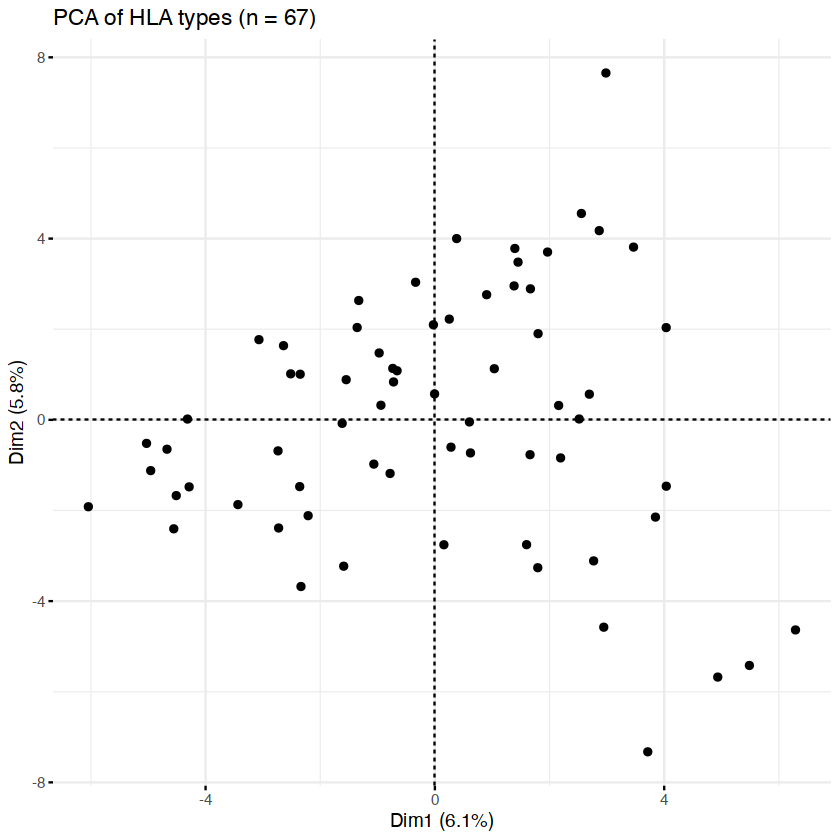

In [41]:
p0

# lmer

In [88]:
pca <- readr::read_rds(paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

# Binding affinities

## HLA I

In [5]:
allhlas <- readr::read_rds(file = paste0(datapath, "HLA/allhla_preqc.rds"))

In [395]:
int_hla <- as.data.frame(matrix(NA, nrow = nrow(allhlas), ncol = 16, dimnames = list(rownames(allhlas), c("A_1", "A_2", "B_1", "B_2", "C_1", "C_2", 
"DRB1_1", "DRB1_2","DQB1_1", "DQB1_2", "DPB1_1", "DPB1_2", "DPA1_1", "DPA1_2", "DQA1_1", "DQA1_2")))  )  # not including DRB345

In [396]:
for(i in 1:nrow(allhlas)){
    myhla <- allhlas[i,,drop = F]
    x <- colnames(myhla)[myhla == 1]
    if( length(x[grepl("A\\*", x)]) == 2 ){
        int_hla[i,c("A_1", "A_2")] <- x[grepl("A\\*", x)] }
        else { int_hla[i,c("A_1", "A_2")] <- c(x[grepl("A\\*", x)], NA)}
    if( length(x[grepl("B\\*", x)]) == 2 ){
        int_hla[i,c("B_1", "B_2")] <- x[grepl("B\\*", x)] }
        else { int_hla[i,c("B_1", "B_2")] <- c(x[grepl("B\\*", x)], NA)}
    if( length(x[grepl("C\\*", x)]) == 2 ){
        int_hla[i,c("C_1", "C_2")] <- x[grepl("C\\*", x)] }
        else { int_hla[i,c("C_1", "C_2")] <- c(x[grepl("C\\*", x)], NA)}
    if( length(x[grepl("DRB1\\*", x)]) == 2 ){
        int_hla[i,c("DRB1_1", "DRB1_2")] <- x[grepl("DRB1\\*", x)] }
        else { int_hla[i,c("DRB1_1", "DRB1_2")] <- c(x[grepl("DRB1\\*", x)], NA)}
    if( length(x[grepl("DQB1\\*", x)]) == 2 ){
        int_hla[i,c("DQB1_1", "DQB1_2")] <- x[grepl("DQB1\\*", x)] }
        else { int_hla[i,c("DQB1_1", "DQB1_2")] <- c(x[grepl("DQB1\\*", x)], NA)}
    if( length(x[grepl("DPB1\\*", x)]) == 2 ){
        int_hla[i,c("DPB1_1", "DPB1_2")] <- x[grepl("DPB1\\*", x)] }
        else { int_hla[i,c("DPB1_1", "DPB1_2")] <- c(x[grepl("DPB1\\*", x)], NA)}
    if( length(x[grepl("DPA1\\*", x)]) == 2 ){
        int_hla[i,c("DPA1_1", "DPA1_2")] <- x[grepl("DPA1\\*", x)] }
        else { int_hla[i,c("DPA1_1", "DPA1_2")] <- c(x[grepl("DPA1\\*", x)], NA)}
    if( length(x[grepl("DQA1\\*", x)]) == 2 ){
        int_hla[i,c("DQA1_1", "DQA1_2")] <- x[grepl("DQA1\\*", x)] }
        else { int_hla[i,c("DQA1_1", "DQA1_2")] <- c(x[grepl("DQA1\\*", x)], NA)}

} 

In [397]:
for(i in 1:nrow(allhlas)){
     myhla <- allhlas[i,,drop = F]
y <- colnames(myhla)[myhla == 2]
     if( length(y[grepl("A\\*", y)]) == 1 ){
        int_hla[i,c("A_1", "A_2")] <- rep(y[grepl("A\\*", y)],2) }
    if( length(y[grepl("B\\*", y)]) == 1 ){
        int_hla[i,c("B_1", "B_2")] <- rep(y[grepl("B\\*", y)],2) }
    if( length(y[grepl("C\\*", y)]) == 1 ){
        int_hla[i,c("C_1", "C_2")] <- rep(y[grepl("C\\*", y)],2) }
    if( length(y[grepl("DRB1\\*", y)]) == 1 ){
        int_hla[i,c("DRB1_1", "DRB1_2")] <- rep(y[grepl("DRB1\\*", y)],2) }
    if( length(y[grepl("DQB1\\*", y)]) == 1 ){
        int_hla[i,c("DQB1_1", "DQB1_2")] <- rep(y[grepl("DQB1\\*", y)],2) }
    if( length(y[grepl("DPB1\\*", y)]) == 1 ){
        int_hla[i,c("DPB1_1", "DPB1_2")] <- rep(y[grepl("DPB1\\*", y)],2) }
    if( length(y[grepl("DPA1\\*", y)]) == 1 ){
        int_hla[i,c("DPA1_1", "DPA1_2")] <- rep(y[grepl("DPA1\\*", y)],2) }
    if( length(y[grepl("DQA1\\*", y)]) == 1 ){
        int_hla[i,c("DQA1_1", "DQA1_2")] <- rep(y[grepl("DQA1\\*", y)],2) }
    
}

In [398]:
tail(int_hla)

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DQB1_1,DQB1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2,DQA1_1,DQA1_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
414-02,A*02:01:01,A*30:04:01,B*07:02:01,B*44:02:01,C*05:01:01,C*07:02:01,DRB1*01:01:01,DRB1*15:01:01,DQB1*05:01:01,DQB1*06:02:01,DPB1*04:01:01,DPB1*20:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:01:01,DQA1*01:02:01
415-03,A*02:01:01,A*24:02:01,B*40:01:02,B*55:01:01,C*03:03:01,C*03:04:01,DRB1*04:04:01,DRB1*15:01:01,DQB1*03:02:01,DQB1*06:02:01,DPB1*04:01:01,DPB1*06:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:02:01,DQA1*03:01:01
417-02,A*03:01:01,A*25:01:01,B*18:01:01,B*40:01:02,C*03:04:01,C*12:03:01,DRB1*13:02:01,DRB1*15:01:01,DQB1*06:02:01,DQB1*06:04:01,DPB1*03:01:01,DPB1*23:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:02:01,DQA1*01:02:01
418-02,A*68:01:02,A*68:03:01,B*39:05:01,B*44:02:01,C*07:02:01,C*07:04:01,DRB1*01:01:01,DRB1*04:04:01,DQB1*03:02:01,DQB1*05:01:01,DPB1*09:01:01,DPB1*14:01:01,DPA1*02:01:01,DPA1*02:01:01,DQA1*01:01:01,DQA1*03:01:01
419-02,A*02:01:01,A*03:01:01,B*07:02:01,B*45:01:01,C*06:02:01,C*07:02:01,DRB1*14:54:01,DRB1*15:01:01,DQB1*05:03:01,DQB1*06:02:01,DPB1*03:01:01,DPB1*04:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:02:01,DQA1*01:04:01
422-01,A*11:01:01,A*23:01:01,B*07:02:01,B*07:02:01,C*07:02:01,C*07:02:01,DRB1*13:01:01,DRB1*15:01:01,DQB1*06:02:01,DQB1*06:03:01,DPB1*04:01:01,DPB1*04:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:02:01,DQA1*01:03:01


In [399]:
readr::write_rds(int_hla, paste0(datapath, "HLA/int_hla_matrix.rds") )

In [400]:
int_hlaI <- int_hla[, c("A_1", "A_2", "B_1", "B_2", "C_1", "C_2")]

In [401]:
# remove last three characters
int_hlaI <- gsub("...$", "", as.matrix(int_hlaI)) 

In [402]:
head(int_hlaI)

,A_1,A_2,B_1,B_2,C_1,C_2
315-05,A*02:01,A*02:05,B*35:01,B*49:01,C*04:01,C*07:01
319-05,A*01:01,A*03:01,B*07:02,B*51:01,C*07:02,C*14:02
323-03,A*11:01,A*23:01,B*41:01,B*49:01,C*07:01,C*17:01
329-04,A*26:01,A*26:01,B*07:02,B*49:01,C*07:01,C*07:02
330-05,A*02:01,A*33:03,B*13:02,B*18:01,C*05:01,C*06:02
331-04,A*02:01,A*26:01,B*35:03,B*38:01,C*04:01,C*12:03


In [403]:
bd <- read.table(paste0(h4hpath, "analysis/HLA/bdata.20130222.mhci.txt"), sep = "\t", header = T)
bd_human <- bd[ bd$species == "human",]

In [404]:
head(bd_human)

,species,mhc,peptide_length,sequence,inequality,meas
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
5010,human,HLA-A*01:01,8,ASFCGSPY,=,51.4000
5011,human,HLA-A*01:01,8,LTDFGLSK,=,739.3855
5012,human,HLA-A*01:01,8,FTSFFYRY,=,1285.0000
5013,human,HLA-A*01:01,8,KSVFNSLY,=,1466.0000
5014,human,HLA-A*01:01,8,RDWAHNSL,=,1804.6755
5015,human,HLA-A*01:01,8,FSSCPVAY,=,1939.4666


In [445]:
meanval <- vector()
for( i in unique(bd_human$mhc)){
  tmp <- bd_human[ bd_human$mhc == i,]
  meanval <- c(meanval, mean(tmp$meas))
}
names(meanval) <- unique(bd_human$mhc)

In [446]:
# minval <- readr::read_rds(paste0(h4hpath, "analysis/HLA/minval.rds") )

In [447]:
names(meanval) <- gsub("HLA-", "", names(meanval))

In [448]:
int_hlaI_meanval <- int_hlaI

In [449]:
int_hlaI_meanval[,1] <- meanval[int_hlaI[,1]]
int_hlaI_meanval[,2] <- meanval[int_hlaI[,2]]
int_hlaI_meanval[,3] <- meanval[int_hlaI[,3]]
int_hlaI_meanval[,4] <- meanval[int_hlaI[,4]]
int_hlaI_meanval[,5] <- meanval[int_hlaI[,5]]
int_hlaI_meanval[,6] <- meanval[int_hlaI[,6]]

In [450]:
int_hlaI_meanval_narm <- int_hlaI_meanval[complete.cases(int_hlaI_meanval),]

In [451]:
class(int_hlaI_meanval_narm) <- "numeric"

In [452]:
head(int_hlaI_meanval_narm)

,A_1,A_2,B_1,B_2,C_1,C_2
319-05,25049.41,19084.59,20968.09,24484.53,2018.1119,2469.9649
331-04,25936.65,25220.16,53117.17,13490.88,9777.3523,193.7384
343-03,25936.65,19084.59,23761.23,53117.17,9777.3523,8227.8264
345-02,25936.65,18338.98,20968.09,23761.23,2018.1119,193.7384
347-05,19084.59,21046.55,20968.09,19701.96,9777.3523,2018.1119
348-04,25220.16,25220.16,13490.88,13490.88,193.7384,193.7384


In [453]:
hmeans <- apply(int_hlaI_meanval_narm,1, function(x) { psych::harmonic.mean(x)})

In [454]:
names(hmeans) <- paste0("CHP_", names(hmeans))
names(hmeans) <- gsub("...$", "", names(hmeans))

In [455]:
sort(hmeans)

CHP_348    CHP_396    CHP_345    CHP_385    CHP_362    CHP_395    CHP_331 
  568.6799  1025.3455  1027.4019  1096.9826  1097.8976  1100.2363  1103.9489 
   CHP_422    CHP_319    CHP_347    CHP_402    CHP_419    CHP_413    CHP_388 
 5107.8907  5549.2369  7536.2707  7635.9810  8550.9223  8717.6909 10470.3300 
   CHP_393    CHP_400    CHP_361    CHP_350    CHP_398    CHP_343    CHP_381 
13596.3717 14831.1116 14935.2725 14994.5568 15108.2321 15970.9798 17898.1045 
   CHP_353    CHP_363    CHP_404    CHP_407 
18036.2741 18348.0577 18585.8604 18864.6387

In [456]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [457]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [458]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

In [459]:
tmp <- pbmc[ pbmc$Patient %in% names(hmeans),]

In [460]:
names(sort(hmeans))

[1] "CHP_348" "CHP_396" "CHP_345" "CHP_385" "CHP_362" "CHP_395" "CHP_331"
 [8] "CHP_422" "CHP_319" "CHP_347" "CHP_402" "CHP_419" "CHP_413" "CHP_388"
[15] "CHP_393" "CHP_400" "CHP_361" "CHP_350" "CHP_398" "CHP_343" "CHP_381"
[22] "CHP_353" "CHP_363" "CHP_404" "CHP_407"

In [461]:
as.data.frame(hmeans)

,hmeans
,<dbl>
CHP_319,5549.2369
CHP_331,1103.9489
CHP_343,15970.9798
CHP_345,1027.4019
CHP_347,7536.2707
CHP_348,568.6799
CHP_350,14994.5568
CHP_353,18036.2741
CHP_361,14935.2725


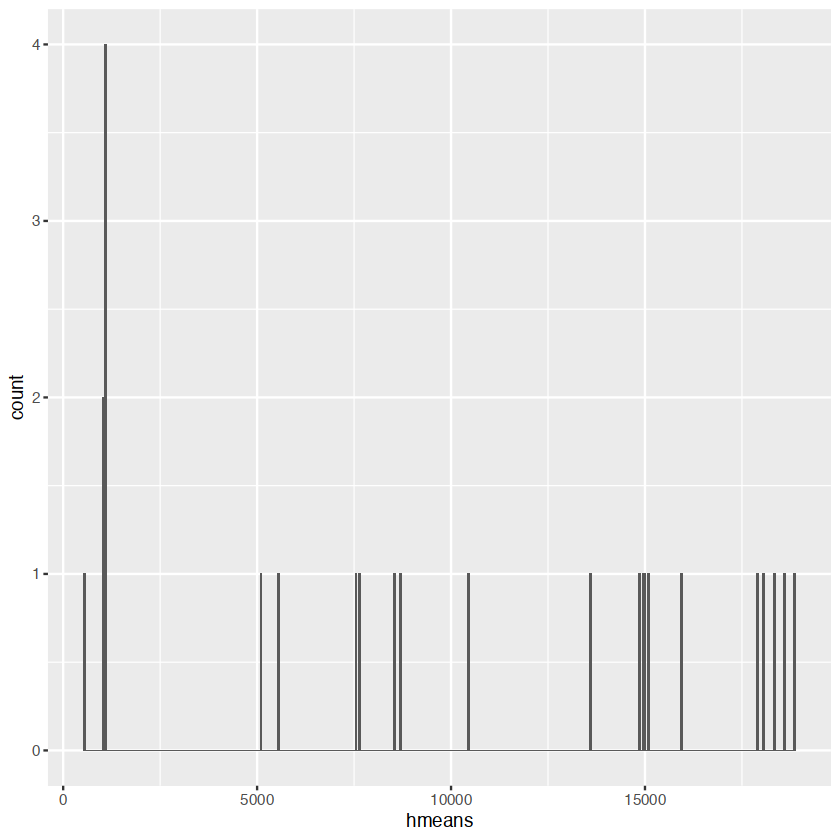

In [466]:
ggplot(as.data.frame(hmeans) )+ geom_histogram(aes(x = hmeans), binwidth = 50)

In [139]:
tmp$Patient <- factor(tmp$Patient, levels = names(sort(hmeans)))

In [140]:
colnames(tmp)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

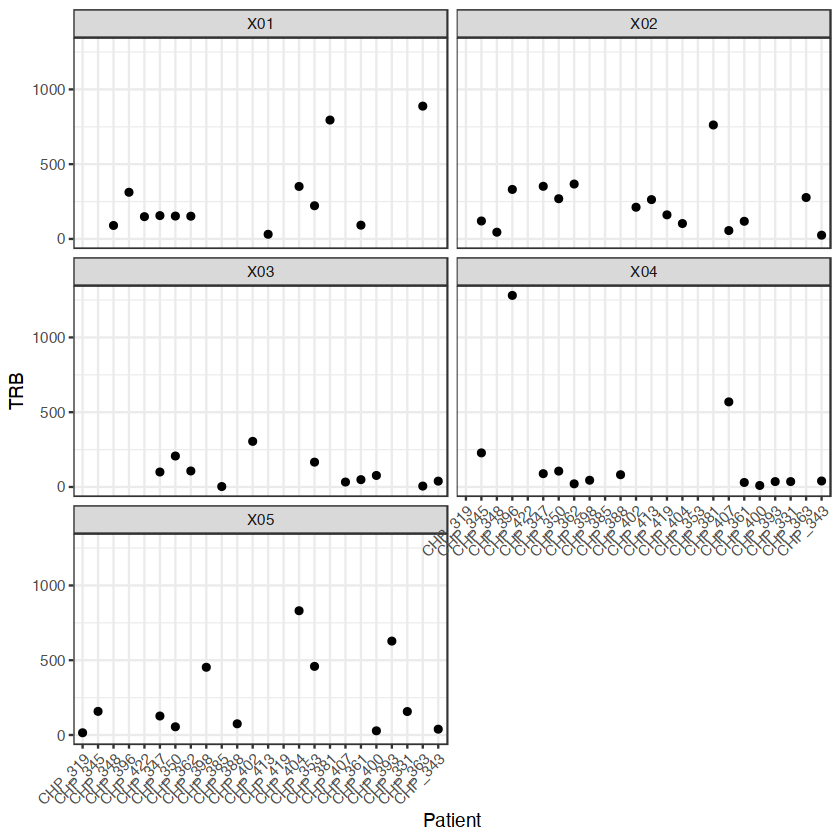

In [145]:
ggplot(data = tmp, aes(y = TRB, x = Patient)) + geom_point() + facet_wrap(~cycle, ncol = 2) + theme_bw() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

## HLA II

In [322]:
int_hla <- readr::read_rds(paste0(datapath, "HLA/int_hla_matrix.rds") )

In [323]:
head(int_hla)

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DQB1_1,DQB1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2,DQA1_1,DQA1_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
315-05,A*02:01:01,A*02:05:01,B*35:01:01,B*49:01:01,C*04:01:01,C*07:01:01,DRB1*13:02:01,DRB1*13:04,DQB1*03:19:01,DQB1*06:04:01,DPB1*01:01:01,DPB1*04:02:01,DPA1*01:03:01,DPA1*02:02:02,DQA1*01:02:01,DQA1*05:05:01
319-05,A*01:01:01,A*03:01:01,B*07:02:01,B*51:01:01,C*07:02:01,C*14:02:01,DRB1*03:01:01,DRB1*11:01:01,DQB1*02:01:01,DQB1*03:01:01,DPB1*03:01:01,DPB1*03:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*05:01:01,DQA1*05:09:01
323-03,A*11:01:01,A*23:01:01,B*41:01:01,B*49:01:01,C*07:01:01,C*17:01:01,DRB1*01:02:01,DRB1*04:05:01,DQB1*03:02:01,DQB1*05:01:01,DPB1*04:01:01,DPB1*13:01:01,DPA1*01:03:01,DPA1*02:01:01,DQA1*01:01:02,DQA1*03:03:01
329-04,A*26:01:01,A*26:01:01,B*07:02:01,B*49:01:01,C*07:01:01,C*07:02:01,DRB1*15:01:01,DRB1*16:01:01,DQB1*05:02:01,DQB1*06:02:01,DPB1*03:01:01,DPB1*04:01:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:02:01,DQA1*01:02:02
330-05,A*02:01:01,A*33:03:01,B*13:02:01,B*18:01:01,C*05:01:01,C*06:02:01,DRB1*03:01:01,DRB1*07:01:01,DQB1*02:01:01,DQB1*02:02:01,DPB1*04:01:01,DPB1*13:01:01,DPA1*01:03:01,DPA1*02:01:01,DQA1*02:01:01,DQA1*05:01:01
331-04,A*02:01:01,A*26:01:01,B*35:03:01,B*38:01:01,C*04:01:01,C*12:03:01,DRB1*01:01:01,DRB1*04:02:01,DQB1*03:02:01,DQB1*05:01:01,DPB1*02:01:02,DPB1*04:02:01,DPA1*01:03:01,DPA1*01:03:01,DQA1*01:01:01,DQA1*03:01:01


In [324]:
int_hlaII <- int_hla[, c("DRB1_1", "DRB1_2", "DQB1_1", "DQB1_2", "DPB1_1", "DPB1_2", "DPA1_1", "DPA1_2", "DQA1_1", "DQA1_2" )]

In [325]:
# remove last three characters
int_hlaII <- gsub("...$", "", as.matrix(int_hlaII)) 
int_hlaII <- gsub(":", "", as.matrix(int_hlaII)) 

In [326]:
head(int_hlaII)

,DRB1_1,DRB1_2,DQB1_1,DQB1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2,DQA1_1,DQA1_2
315-05,DRB1*1302,DRB1*13,DQB1*0319,DQB1*0604,DPB1*0101,DPB1*0402,DPA1*0103,DPA1*0202,DQA1*0102,DQA1*0505
319-05,DRB1*0301,DRB1*1101,DQB1*0201,DQB1*0301,DPB1*0301,DPB1*0301,DPA1*0103,DPA1*0103,DQA1*0501,DQA1*0509
323-03,DRB1*0102,DRB1*0405,DQB1*0302,DQB1*0501,DPB1*0401,DPB1*1301,DPA1*0103,DPA1*0201,DQA1*0101,DQA1*0303
329-04,DRB1*1501,DRB1*1601,DQB1*0502,DQB1*0602,DPB1*0301,DPB1*0401,DPA1*0103,DPA1*0103,DQA1*0102,DQA1*0102
330-05,DRB1*0301,DRB1*0701,DQB1*0201,DQB1*0202,DPB1*0401,DPB1*1301,DPA1*0103,DPA1*0201,DQA1*0201,DQA1*0501
331-04,DRB1*0101,DRB1*0402,DQB1*0302,DQB1*0501,DPB1*0201,DPB1*0402,DPA1*0103,DPA1*0103,DQA1*0101,DQA1*0301


In [327]:
hlaiis <- list.files(paste0(datapath, "/HLA/classII_binding_data_Nov_16_2009/class_II_similarity_reduced_5cv_sep/"), pattern = "train", full.names = T)

In [328]:
hlaiis <- hlaiis[ !grepl("H-2", hlaiis)]

In [329]:
hlaiifiles <- lapply(hlaiis, function(x) {
  read.table(x, header = FALSE, sep = "\t", stringsAsFactors = FALSE, check.names = F)
})

In [330]:
allhlaii <- do.call(rbind, hlaiifiles)

In [331]:
colnames(allhlaii) <- c("species","mhc","peptide_length", "TBD", "sequence","inequality","meas")

In [332]:
meanval <- vector()
for( i in unique(allhlaii$mhc)){
  tmp <- allhlaii[ allhlaii$mhc == i,]
  meanval <- c(meanval, mean(tmp$meas))
}
names(meanval) <- unique(allhlaii$mhc)

In [333]:
head(meanval)

HLA-DPA1*01/DPB1*0401 HLA-DPA1*0103/DPB1*0201 HLA-DPA1*0201/DPB1*0101 
              13394.906                8919.105                7288.162 
HLA-DPA1*0201/DPB1*0501 HLA-DPA1*0301/DPB1*0402 HLA-DPB1*0301/DPB1*0401 
              13794.266                9221.004               14645.586

In [334]:
# minval <- readr::read_rds(paste0(h4hpath, "analysis/HLA/minval.rds") )

In [335]:
names(meanval) <- gsub("HLA-", "", names(meanval))

In [336]:
int_hlaII_meanval <- matrix(NA, nrow = nrow(int_hlaII), ncol = 10, dimnames = list(rownames(int_hlaII), 
c("DRB1_1", "DRB1_2", "DQ1", "DQ2", "DQ3", "DQ4", "DP1", "DP2", "DP3", "DP4")))

In [337]:
int_hlaII_meanval[, c("DRB1_1", "DRB1_2")] <- int_hlaII[,c("DRB1_1", "DRB1_2")]

In [338]:
head(int_hlaII_meanval)

,DRB1_1,DRB1_2,DQ1,DQ2,DQ3,DQ4,DP1,DP2,DP3,DP4
315-05,DRB1*1302,DRB1*13,NA,NA,NA,NA,NA,NA,NA,NA
319-05,DRB1*0301,DRB1*1101,NA,NA,NA,NA,NA,NA,NA,NA
323-03,DRB1*0102,DRB1*0405,NA,NA,NA,NA,NA,NA,NA,NA
329-04,DRB1*1501,DRB1*1601,NA,NA,NA,NA,NA,NA,NA,NA
330-05,DRB1*0301,DRB1*0701,NA,NA,NA,NA,NA,NA,NA,NA
331-04,DRB1*0101,DRB1*0402,NA,NA,NA,NA,NA,NA,NA,NA


In [339]:
for( i in 1:nrow(int_hlaII)){
  tmp <- expand.grid(int_hlaII[i , c("DQA1_1", "DQA1_2")], int_hlaII[i, c("DQB1_1", "DQB1_2")], stringsAsFactors = FALSE)
  tmp$V1 <- paste(tmp$Var1, tmp$Var2, sep = "/")
  int_hlaII_meanval[i, c("DQ1", "DQ2", "DQ3", "DQ4")] <- tmp$V1
  
  tmp <- expand.grid(int_hlaII[i , c("DPA1_1", "DPA1_2")], int_hlaII[i, c("DPB1_1", "DPB1_2")], stringsAsFactors = FALSE)
  tmp$V1 <- paste(tmp$Var1, tmp$Var2, sep = "/")
  int_hlaII_meanval[i, c("DP1", "DP2", "DP3", "DP4")] <- tmp$V1
}

In [340]:
int_hlaII_meanval_names <- int_hlaII_meanval

In [341]:
head(int_hlaII_meanval)

,DRB1_1,DRB1_2,DQ1,DQ2,DQ3,DQ4,DP1,DP2,DP3,DP4
315-05,DRB1*1302,DRB1*13,DQA1*0102/DQB1*0319,DQA1*0505/DQB1*0319,DQA1*0102/DQB1*0604,DQA1*0505/DQB1*0604,DPA1*0103/DPB1*0101,DPA1*0202/DPB1*0101,DPA1*0103/DPB1*0402,DPA1*0202/DPB1*0402
319-05,DRB1*0301,DRB1*1101,DQA1*0501/DQB1*0201,DQA1*0509/DQB1*0201,DQA1*0501/DQB1*0301,DQA1*0509/DQB1*0301,DPA1*0103/DPB1*0301,DPA1*0103/DPB1*0301,DPA1*0103/DPB1*0301,DPA1*0103/DPB1*0301
323-03,DRB1*0102,DRB1*0405,DQA1*0101/DQB1*0302,DQA1*0303/DQB1*0302,DQA1*0101/DQB1*0501,DQA1*0303/DQB1*0501,DPA1*0103/DPB1*0401,DPA1*0201/DPB1*0401,DPA1*0103/DPB1*1301,DPA1*0201/DPB1*1301
329-04,DRB1*1501,DRB1*1601,DQA1*0102/DQB1*0502,DQA1*0102/DQB1*0502,DQA1*0102/DQB1*0602,DQA1*0102/DQB1*0602,DPA1*0103/DPB1*0301,DPA1*0103/DPB1*0301,DPA1*0103/DPB1*0401,DPA1*0103/DPB1*0401
330-05,DRB1*0301,DRB1*0701,DQA1*0201/DQB1*0201,DQA1*0501/DQB1*0201,DQA1*0201/DQB1*0202,DQA1*0501/DQB1*0202,DPA1*0103/DPB1*0401,DPA1*0201/DPB1*0401,DPA1*0103/DPB1*1301,DPA1*0201/DPB1*1301
331-04,DRB1*0101,DRB1*0402,DQA1*0101/DQB1*0302,DQA1*0301/DQB1*0302,DQA1*0101/DQB1*0501,DQA1*0301/DQB1*0501,DPA1*0103/DPB1*0201,DPA1*0103/DPB1*0201,DPA1*0103/DPB1*0402,DPA1*0103/DPB1*0402


In [342]:
int_hlaII_meanval[,1] <- meanval[int_hlaII_meanval_names[,1]]
int_hlaII_meanval[,2] <- meanval[int_hlaII_meanval_names[,2]]
int_hlaII_meanval[,3] <- meanval[int_hlaII_meanval_names[,3]]
int_hlaII_meanval[,4] <- meanval[int_hlaII_meanval_names[,4]]
int_hlaII_meanval[,5] <- meanval[int_hlaII_meanval_names[,5]]
int_hlaII_meanval[,6] <- meanval[int_hlaII_meanval_names[,6]]
int_hlaII_meanval[,7] <- meanval[int_hlaII_meanval_names[,7]]
int_hlaII_meanval[,8] <- meanval[int_hlaII_meanval_names[,8]]
int_hlaII_meanval[,9] <- meanval[int_hlaII_meanval_names[,9]]
int_hlaII_meanval[,10] <- meanval[int_hlaII_meanval_names[,10]]

In [343]:
length(unique(names(meanval)) )

[1] 26

In [344]:
names(meanval)[grepl("DPB1", names(meanval))]  

[1] "DPA1*01/DPB1*0401"   "DPA1*0103/DPB1*0201" "DPA1*0201/DPB1*0101"
[4] "DPA1*0201/DPB1*0501" "DPA1*0301/DPB1*0402" "DPB1*0301/DPB1*0401"

In [347]:
#int_hlaII_meanval_narm <- int_hlaII_meanval[complete.cases(int_hlaII_meanval),]

In [349]:
class(int_hlaI_meanval) <- "numeric"

In [350]:
head(int_hlaI_meanval)

,A_1,A_2,B_1,B_2,C_1,C_2
315-05,1,2.4,1.00000,NA,2.000000,2.000001
319-05,1,1.0,1.00000,1,1.000000,1.000000
323-03,1,1.0,NA,NA,2.000001,NA
329-04,1,1.0,1.00000,NA,2.000001,1.000000
330-05,1,NA,NA,1,1.000000,1.859269
331-04,1,1.0,2.50025,1,2.000000,1.000000


In [351]:
hmeans <- apply(int_hlaI_meanval,1, function(x) { psych::harmonic.mean(x)})

In [352]:
names(hmeans) <- paste0("CHP_", names(hmeans))
names(hmeans) <- gsub("...$", "", names(hmeans))

In [353]:
sort(hmeans)

CHP_319  CHP_339  CHP_345  CHP_346  CHP_348  CHP_349  CHP_359  CHP_364 
1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 
 CHP_365  CHP_369  CHP_376  CHP_380  CHP_387  CHP_395  CHP_396  CHP_414 
1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 
 CHP_415  CHP_417  CHP_418  CHP_422  CHP_347  CHP_350  CHP_362  CHP_398 
1.000000 1.000000 1.000000 1.000000 1.090909 1.090909 1.090909 1.090909 
 CHP_385  CHP_388  CHP_402  CHP_413  CHP_410  CHP_338  CHP_344  CHP_367 
1.090909 1.090909 1.090909 1.090909 1.101844 1.111111 1.111111 1.111111 
 CHP_374  CHP_405  CHP_409  CHP_329  CHP_351  CHP_370  CHP_373  CHP_397 
1.111111 1.111111 1.111111 1.111111 1.111111 1.111111 1.111111 1.111111 
 CHP_412  CHP_330  CHP_378  CHP_419  CHP_390  CHP_404  CHP_353  CHP_381 
1.111111 1.130632 1.142857 1.171093 1.182105 1.190985 1.190985 1.190985 
 CHP_407  CHP_355  CHP_368  CHP_361  CHP_400  CHP_323  CHP_357  CHP_393 
1.190985 1.200000 1.200000 1.200000 1.200000 1.200000 1.200000 1.200000 
 CHP_408  CHP_358  CHP_360  CHP_331  CHP_401  CHP_363  CHP_352  CHP_343 
1.213625 1.223819 1.223819 1.224500 1.250000 1.297741 1.333333 1.363649 
 CHP_356  CHP_375  CHP_315 
1.447382 1.447382 1.463415

In [354]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [355]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [356]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

In [375]:
tmp <- cfdna[ cfdna$Patient %in% names(hmeans),]

In [376]:
names(sort(hmeans))

[1] "CHP_319" "CHP_339" "CHP_345" "CHP_346" "CHP_348" "CHP_349" "CHP_359"
 [8] "CHP_364" "CHP_365" "CHP_369" "CHP_376" "CHP_380" "CHP_387" "CHP_395"
[15] "CHP_396" "CHP_414" "CHP_415" "CHP_417" "CHP_418" "CHP_422" "CHP_347"
[22] "CHP_350" "CHP_362" "CHP_398" "CHP_385" "CHP_388" "CHP_402" "CHP_413"
[29] "CHP_410" "CHP_338" "CHP_344" "CHP_367" "CHP_374" "CHP_405" "CHP_409"
[36] "CHP_329" "CHP_351" "CHP_370" "CHP_373" "CHP_397" "CHP_412" "CHP_330"
[43] "CHP_378" "CHP_419" "CHP_390" "CHP_404" "CHP_353" "CHP_381" "CHP_407"
[50] "CHP_355" "CHP_368" "CHP_361" "CHP_400" "CHP_323" "CHP_357" "CHP_393"
[57] "CHP_408" "CHP_358" "CHP_360" "CHP_331" "CHP_401" "CHP_363" "CHP_352"
[64] "CHP_343" "CHP_356" "CHP_375" "CHP_315"

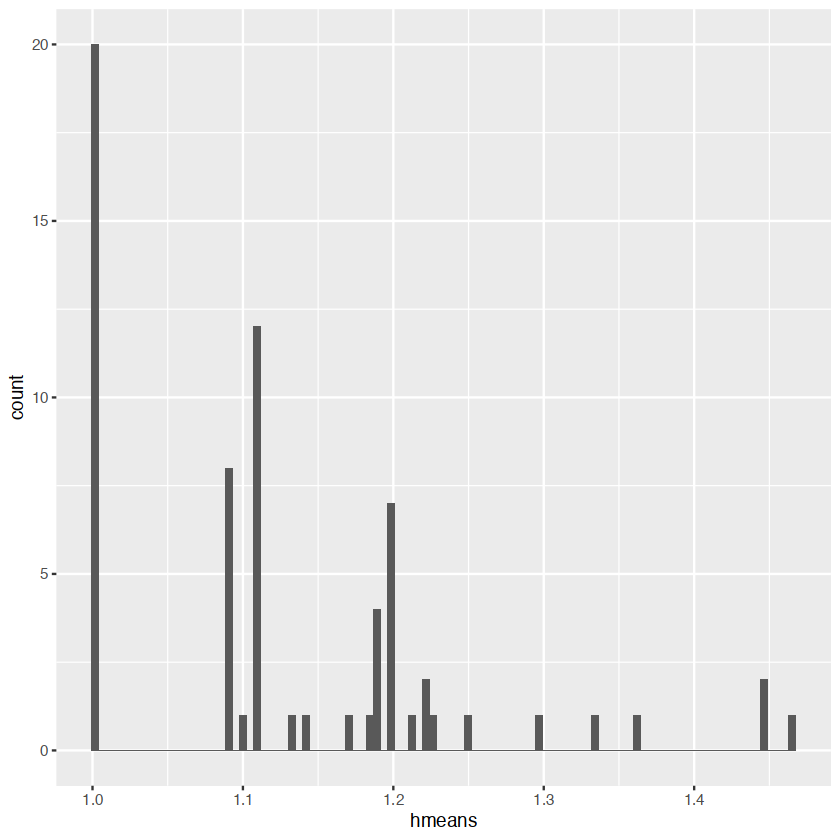

In [377]:
ggplot(as.data.frame(hmeans) )+ geom_histogram(aes(x = hmeans), bins = 100)

In [378]:
tmp$Patient <- factor(tmp$Patient, levels = names(sort(hmeans)))

In [379]:
colnames(tmp)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

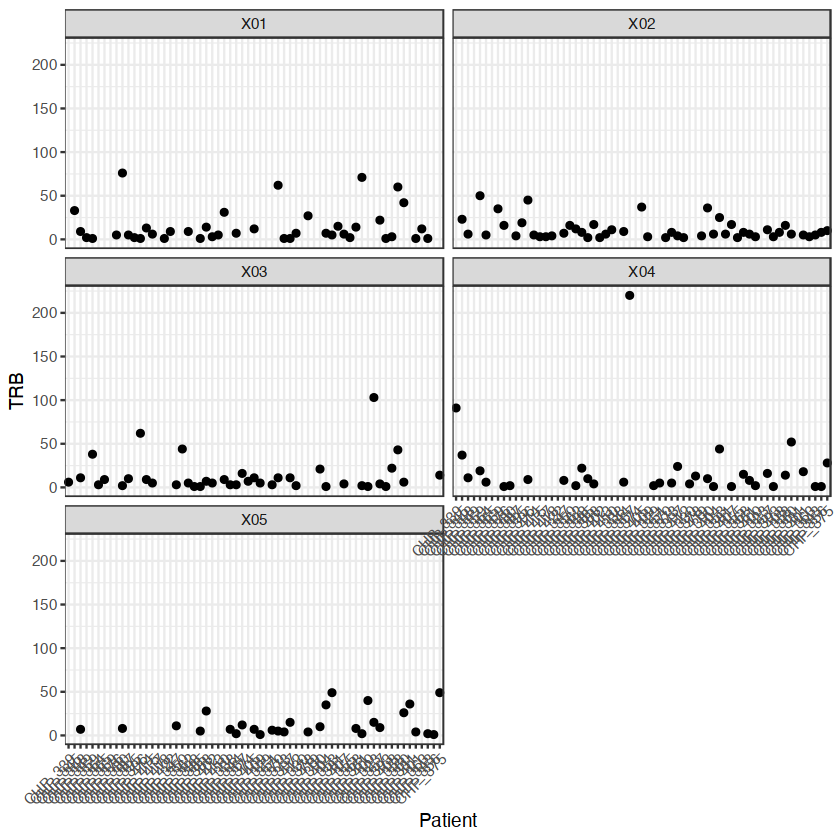

In [392]:
ggplot(data = tmp, aes(y = TRB, x = Patient)) + geom_point() + facet_wrap(~cycle, ncol = 2) + theme_bw() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Find ranks

In [4]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [5]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [6]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

In [7]:
hlamat <- readr::read_rds(paste0(datapath, "HLA/int_hla_matrix.rds") )

In [8]:
int_hlaI <- hlamat[, c("A_1", "A_2", "B_1", "B_2", "C_1", "C_2")]

In [9]:
# remove last three characters
int_hlaI <- gsub("...$", "", as.matrix(int_hlaI)) 

In [10]:
head(int_hlaI)

,A_1,A_2,B_1,B_2,C_1,C_2
315-05,A*02:01,A*02:05,B*35:01,B*49:01,C*04:01,C*07:01
319-05,A*01:01,A*03:01,B*07:02,B*51:01,C*07:02,C*14:02
323-03,A*11:01,A*23:01,B*41:01,B*49:01,C*07:01,C*17:01
329-04,A*26:01,A*26:01,B*07:02,B*49:01,C*07:01,C*07:02
330-05,A*02:01,A*33:03,B*13:02,B*18:01,C*05:01,C*06:02
331-04,A*02:01,A*26:01,B*35:03,B*38:01,C*04:01,C*12:03


In [11]:
hlais <- apply(int_hlaI,1, function(x) {
  paste(unlist(x), collapse = ",")}) 

In [12]:
h4hpath

[1] "/Users/anabbi/Desktop/H4H/INTERCEPT/"

In [13]:
# readr::write_rds(hlais, paste0(h4hpath, "analysis/HLA/int_hlaI.rds") )

In [14]:
load(file = paste0(datapath, "Adaptivedatasets/allAdaptive.RData"))

In [15]:
head(allAdaptive)

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Preterm_23_3,Carey,Neonate,Male,Ctrl,Preterm_23_3,0
2,Preterm_25_5,Carey,Neonate,Female,Ctrl,Preterm_25_5,0
3,Preterm_26_B_2,Carey,Neonate,Male,Ctrl,Preterm_26_B_2,0
4,Preterm_27_4,Carey,Neonate,Female,Ctrl,Preterm_27_4,0
5,Adult_1_15-04,Carey,Adult,NA,Ctrl,Adult_1_15-04,39
6,Adult_2_15-07,Carey,Adult,NA,Ctrl,Adult_2_15-07,39


In [16]:
mitch_meta <- allAdaptive[ allAdaptive$study == "Mitchell",]

In [17]:
int <- readr::read_rds(paste0(h4hpath, "analysis/HLA/int_hlaI.rds") )
mitch <- readr::read_rds(paste0(h4hpath, "analysis/HLA/mitch_hlaI.rds") )

In [18]:
int_mitch <- c(int, mitch)

In [19]:
myranks <- readr::read_rds(paste0(h4hpath, "analysis/HLA/myminranks.rds") )

In [20]:
tmp<-as.data.frame(int_mitch)

In [21]:
tmp$ranks <- myranks[match(tmp$int_mitch, names(myranks))]

In [22]:
tmp <- tmp[ !is.na(tmp$ranks),]

In [23]:
tail(tmp)

,int_mitch,ranks
,<chr>,<dbl>
310177_TCRB,"A*01:01,A*03:01,B*07:02,B*08:01,C*07:01,C*07:02",87262841
310283_TCRB,"A*01:01,A*03:01,B*07:02,B*08:01,C*07:01,C*07:02",87262841
Daisy-16_TCRB,"A*24:02,A*02:01,B*15:01,B*35:01,C*03:03,C*04:01",56297306
Daisy-19_TCRB,"A*24:02,A*02:01,B*15:01,B*35:01,C*03:03,C*04:01",56297306
Daisy-10_TCRB,"A*24:02,A*02:01,B*15:01,B*35:01,C*03:03,C*04:01",56297306
Daisy-2_TCRB,"A*24:02,A*02:01,B*15:01,B*35:01,C*03:03,C*04:01",56297306


In [24]:
tmp$Patient[!grepl("TCRB", rownames(tmp))] <- paste0("CHP_", rownames(tmp)[!grepl("TCRB", rownames(tmp))])

In [25]:
head(tmp)

,int_mitch,ranks,Patient
,<chr>,<dbl>,<chr>
319-05,"A*01:01,A*03:01,B*07:02,B*51:01,C*07:02,C*14:02",29238686,CHP_319-05
331-04,"A*02:01,A*26:01,B*35:03,B*38:01,C*04:01,C*12:03",250536652,CHP_331-04
343-03,"A*02:01,A*03:01,B*18:01,B*35:03,C*04:01,C*07:01",435585459,CHP_343-03
345-02,"A*02:01,A*25:01,B*07:02,B*18:01,C*07:02,C*12:03",23417697,CHP_345-02
347-05,"A*03:01,A*29:02,B*07:02,B*35:01,C*04:01,C*07:02",64260012,CHP_347-05
348-04,"A*26:01,A*26:01,B*38:01,B*38:01,C*12:03,C*12:03",25382649,CHP_348-04


In [26]:
tmp$Patient[!grepl("TCRB", rownames(tmp))] <- gsub("-.*", "", tmp$Patient[!grepl("TCRB", rownames(tmp))])

In [27]:
mitch_meta[ mitch_meta$sample_name == "310177_TCRB",]

,sample_name,study,Agegroup,Sex,disease,subject,age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
264,310177_TCRB,Mitchell,Child,Male,T1D,Subject 010,9


In [28]:
tmp$Patient[is.na(tmp$Patient)] <- mitch_meta$subject[match(rownames(tmp)[is.na(tmp$Patient)], mitch_meta$sample_name)]

In [29]:
head(tmp)

,int_mitch,ranks,Patient
,<chr>,<dbl>,<chr>
319-05,"A*01:01,A*03:01,B*07:02,B*51:01,C*07:02,C*14:02",29238686,CHP_319
331-04,"A*02:01,A*26:01,B*35:03,B*38:01,C*04:01,C*12:03",250536652,CHP_331
343-03,"A*02:01,A*03:01,B*18:01,B*35:03,C*04:01,C*07:01",435585459,CHP_343
345-02,"A*02:01,A*25:01,B*07:02,B*18:01,C*07:02,C*12:03",23417697,CHP_345
347-05,"A*03:01,A*29:02,B*07:02,B*35:01,C*04:01,C*07:02",64260012,CHP_347
348-04,"A*26:01,A*26:01,B*38:01,B*38:01,C*12:03,C*12:03",25382649,CHP_348


In [30]:
tmp <- tmp[!duplicated(tmp$Patient),]

In [31]:
tmp$grp <- NA
tmp$grp[ grepl("CHP", tmp$Patient)] <- "CHP"
tmp$grp[ grepl("Subject", tmp$Patient)] <- "T1D"
tmp$grp[ grepl("Control", tmp$Patient)] <- "Ctrl"

In [32]:
table(tmp$grp)


 CHP Ctrl  T1D 
  25    7    7 

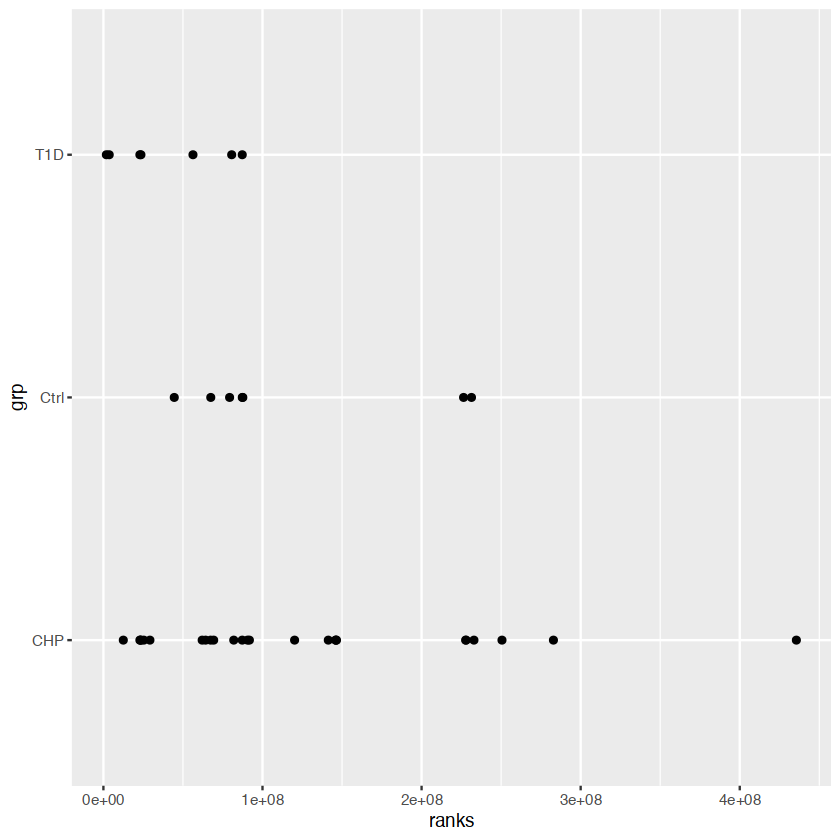

In [33]:
ggplot(tmp) + geom_point(aes(x = ranks, y = grp ))

In [191]:
  # pbmc <- cfdna

In [34]:
pbmc1 <- pbmc[ pbmc$Patient %in% tmp$Patient,]

In [35]:
dim(pbmc1)

[1] 63 66

In [36]:
pbmc1$ranks <- tmp$ranks[ match(pbmc1$Patient, tmp$Patient)]

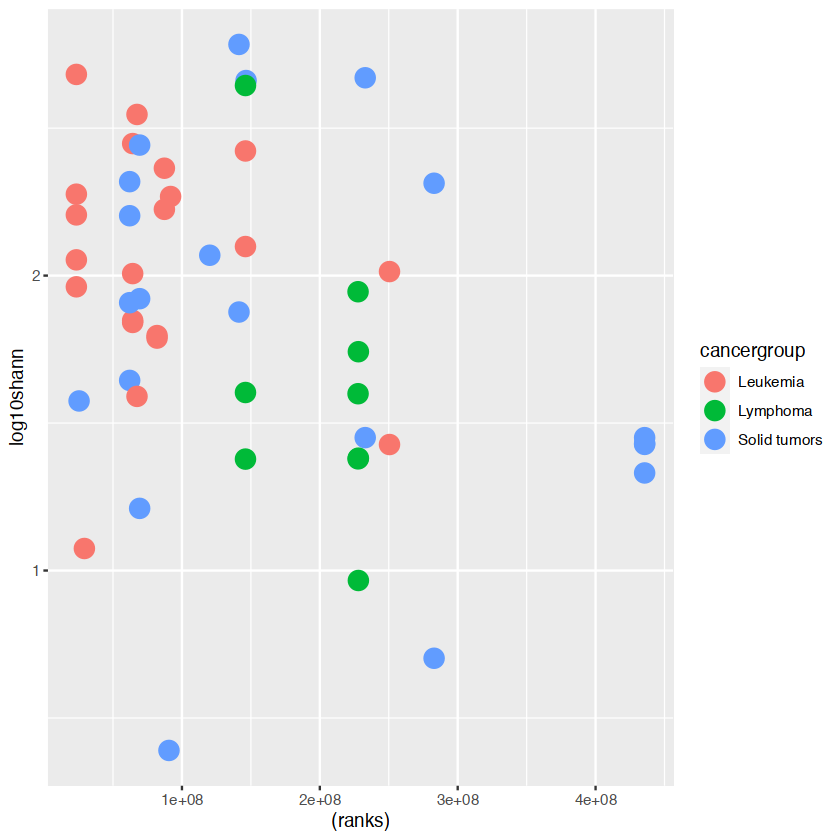

In [37]:
ggplot(pbmc1[ pbmc1$cycle != "X01",]) + geom_point(aes(x = (ranks), y = `log10shann`, color = cancergroup), size = 5)

In [41]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [43]:
pbmc1$cyclenum <- as.numeric(gsub("X0", "", pbmc1$cycle) )

In [44]:
result2 <- pbmc1 %>%
    group_by(Patient) %>%
    mutate(AUC_N = trapz(cyclenum, `Naïve%`) / n() ) %>%
    mutate(AUC_CM = trapz(cyclenum, `CM%`) / n() ) %>%
    mutate(AUC_SCM = trapz(cyclenum, `SCM%`) / n()  ) %>%
    mutate(AUC_EM = trapz(cyclenum, `EM%`) / n() ) %>%
    mutate(AUC_TE = trapz(cyclenum, `TE%`) / n() ) %>%
    mutate(AUC_LAG = trapz(cyclenum, `LAG3%`) / n() ) %>%
    mutate(AUC_TIM = trapz(cyclenum, `TIM3%`) / n() ) %>%
    mutate(AUC_PD1 = trapz(cyclenum, `PD1%`) / n() ) %>%
    mutate(AUC_TCR = trapz(cyclenum, `log10shann`) / n() ) %>%
    # mutate(AUC_cfTCR = trapz(cyclenum, DifferencecfTCR) / n() ) %>%
    ungroup()

In [46]:
mypts <- result2[ !duplicated(result2$Patient), ]

In [48]:
mypts$ranks

[1]  29238686 250536652 435585459  23417697  64260012  25382649  62079292
 [8] 146076316 227728580  69315239 282878244 146505696  90577691  81939866
[15] 232916385  23417497  67396467 227967050  87262491 141359611 146075721
[22]  91761916 120179747  12502854

In [67]:
colnames(mypts)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "ranks"              "cyclenum"           "AUC_N"             
[70] "AUC_CM"             "AUC_SCM"            "AUC_EM"            
[73] "AUC_TE"             "AUC_LAG"            "AUC_TIM"           
[76] "AUC_PD1"            "AUC_TCR"

In [70]:
myfit0 <- lm(AUC_PD1 ~ cancergroup + Age, data= mypts)
myfit1 <- lm(AUC_PD1 ~ ranks + cancergroup + Age, data= mypts)

anova(myfit0, myfit1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,711.5532,NA,NA,NA,NA
2,7,375.3364,1,336.2168,6.270423,0.04074818


In [71]:
myfit1 <- lm(AUC_CM ~ ranks + cancergroup + Age, data= mypts)

In [74]:
summary.lm(myfit1)


Call:
lm(formula = AUC_CM ~ ranks + cancergroup + Age, data = mypts)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.493  -4.114  -1.342   4.558  14.005 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -8.976e-01  5.650e+00  -0.159  0.87772   
ranks                    8.757e-08  2.538e-08   3.451  0.00869 **
cancergroupSolid tumors -3.579e+00  5.523e+00  -0.648  0.53514   
Age                      2.982e-01  4.373e-01   0.682  0.51464   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.811 on 8 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.6094,	Adjusted R-squared:  0.4629 
F-statistic:  4.16 on 3 and 8 DF,  p-value: 0.04747


In [77]:
summary(mypts$ranks)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 12502854  63714832  91169804 128598409 166811417 435585459 

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


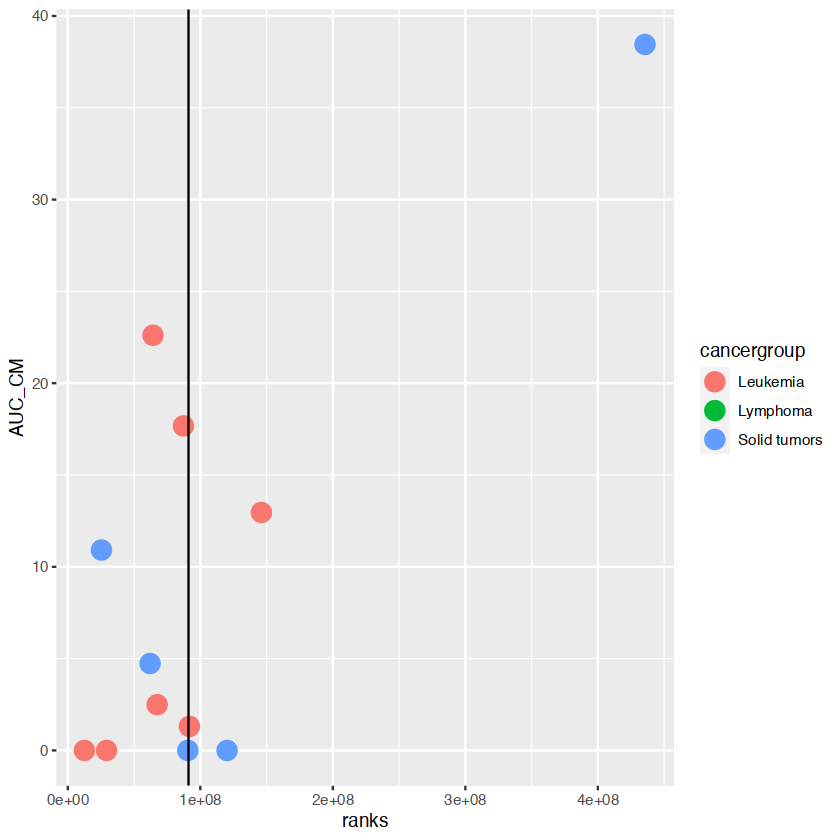

In [81]:
ggplot(mypts) + geom_point(aes(x = ranks, y = AUC_CM, color = cancergroup), size = 5) + geom_vline(xintercept = 91169804)

In [38]:
head(pbmc1)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann,ranks
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
302,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,1.217,10.248,11.626,1.269,CHP_319-05-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,PBMC,CHP,1.074743,29238686
361,CHP_331_04,CHP_331,X04,0.0,0.00,5,SR ALL,0.0,0,NA,...,1.711,18.948,20.709,2.363,CHP_331-04-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-04-PBMC-DNA.txt,PBMC,CHP,1.427243,250536652
362,CHP_331_05,CHP_331,X05,0.0,0.00,5,SR ALL,0.0,0,NA,...,2.835,75.373,80.729,3.079,CHP_331-05-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt,PBMC,CHP,2.013654,250536652
419,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0.397,19.668,20.298,0.549,CHP_343-02-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-02-PBMC-DNA.txt,PBMC,CHP,1.330860,435585459
420,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0.782,18.967,19.381,1.155,CHP_343-03-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-03-PBMC-DNA.txt,PBMC,CHP,1.431235,435585459
421,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0.949,18.786,19.288,1.459,CHP_343-04-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_343-04-PBMC-DNA.txt,PBMC,CHP,1.450588,435585459


In [247]:
allhla_preqc <- readr::read_rds( paste0(datapath, "HLA/mitchel_allhla_preqc.rds"))

In [249]:
head(allhla_preqc[c("310177_TCRB", "310283_TCRB"),])

,HLA-A*0101,HLA-A*0301,HLA-B*1801,HLA-C*0701,HLA-DPA1*0103,HLA-DPB1*0201,HLA-DPB1*0401,HLA-DQA1*0301,HLA-DQA1*0501,HLA-DQB1*0201,...,HLA-B*4102,HLA-C*1703,HLA-DPB1*1601,HLA-A*0205,HLA-B*0706,HLA-C*1505,HLA-DPB1*12401,HLA-DRB1*0405,HLA-DQA1*0302,HLA-DRB1*0901
310177_TCRB,1,1,NA,1,1,NA,1,1,1,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
310283_TCRB,1,1,NA,1,1,NA,1,1,1,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
